#### TODOS
- [x] Scale distplots with log axes
- [x] Scale scatterplots with log-log, z-score
- [x] Add new feature that is (pubs with prof) * de-weight / pubs
- [x] Change prof definition to .25
- [x] Add scatterplots for max/min/mean

In [5]:
import pandas as pd

In [4]:
df_all = pd.read_csv('C:\\Users\\Brend\\Downloads\\correlation.csv', index_col = 'name', encoding = "UTF-8")

In [26]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d publications" % (df_all[df_all['num_pubs'] < i].shape[0], i))

Total: 293023 authors
0 authors with less than 1 publications
6111 authors with less than 2 publications
10732 authors with less than 3 publications
14891 authors with less than 4 publications
18724 authors with less than 5 publications
22434 authors with less than 6 publications
25987 authors with less than 7 publications
29436 authors with less than 8 publications
32750 authors with less than 9 publications
35958 authors with less than 10 publications


In [27]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d coauthorships" % (df_all[df_all['TotalConns'] < i].shape[0], i))

Total: 293023 authors
0 authors with less than 1 coauthorships
21494 authors with less than 2 coauthorships
41888 authors with less than 3 coauthorships
58251 authors with less than 4 coauthorships
71756 authors with less than 5 coauthorships
83432 authors with less than 6 coauthorships
93317 authors with less than 7 coauthorships
102164 authors with less than 8 coauthorships
110017 authors with less than 9 coauthorships
117306 authors with less than 10 coauthorships


In [6]:
df_trimmed = df_all[df_all['num_pubs'] >= 5]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 3]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 193942 authors


In [7]:
df_trimmed = df_trimmed[df_trimmed['max_AR'] < 1000]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 193941 authors


In [8]:
df_trimmed = df_trimmed[df_trimmed['InterCommunityFocus'] < 900]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 193940 authors


In [ ]:
for col in df_trimmed.columns:
    print("\nTop 10 %s" % str(col))
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    print(df_not_null[[col]].sort_values(col, ascending = False).head(10))
    print("\nBottom 10 %s" % str(col))
    print(df_not_null[[col]].sort_values(col, ascending = True).head(10))

In [6]:
interesting_authors = ['Eric S. Lander', 'Robert Langer', 'Marvin Minsky', 'Francis Crick', 'Sydney Brenner', 'Richard Henderson', 'Edward S. Boyden']
df_trimmed.loc[interesting_authors]

num_pubs  IntraCommunityFocus  InterCommunityFocus  \
name                                                                    
Eric S. Lander        726.0             1.458449             0.786175   
Robert Langer        2276.0             1.105141             0.896468   
Marvin Minsky         168.0             0.000000             1.000000   
Francis Crick         323.0             0.798246             1.172932   
Sydney Brenner        481.0             1.250096             0.835693   
Richard Henderson     225.0             1.053191             0.949937   
Edward S. Boyden      376.0             2.247126             0.726010   

                   TotalConns  InterClusterRatio  IntraClusterRatio  \
name                                                                  
Eric S. Lander         5348.0           0.681937           0.318063   
Robert Langer           389.0           0.503856           0.496144   
Marvin Minsky             4.0           1.000000           0.000000   
Francis Crick            39.0           0.538462           0.461538   
Sydney Brenner          285.0           0.603509           0.396491   
Richard Henderson        66.0           0.515152           0.484848   
Edward S. Boyden        161.0           0.819876           0.180124   

                   pct_collab_linauth  pct_collab_linprof  \
name                                                        
Eric S. Lander               0.187796            0.389683   
Robert Langer                0.406968            0.458800   
Marvin Minsky                0.078571            0.078869   
Francis Crick                0.280775            0.281299   
Sydney Brenner               0.270458            0.326303   
Richard Henderson            0.306966            0.358785   
Edward S. Boyden             0.052034            0.134976   

                   pct_collab_sqrtauth  pct_collab_sqrtprof  ...  median_NAR  \
name                                                         ...               
Eric S. Lander                0.341184             0.519778  ...    0.475278   
Robert Langer                 0.472806             0.508145  ...    0.150000   
Marvin Minsky                 0.082508             0.082823  ...    0.150000   
Francis Crick                 0.293242             0.293660  ...    0.227031   
Sydney Brenner                0.346127             0.386857  ...    0.150000   
Richard Henderson             0.365455             0.404005  ...    0.253649   
Edward S. Boyden              0.096892             0.155607  ...    0.188173   

                   min_NAR     avg_PR      max_PR  median_PR    min_PR  \
name                                                                     
Eric S. Lander        0.15  10.361763  179.527591   3.731211  0.150000   
Robert Langer         0.15   4.873018   21.636555   0.317467  0.150000   
Marvin Minsky         0.15   0.150000    0.150000   0.150000  0.150000   
Francis Crick         0.15   9.581411  129.899075   3.086678  0.150000   
Sydney Brenner        0.15   9.126704  234.115985   0.236547  0.150000   
Richard Henderson     0.15   1.642377    4.375256   1.158708  0.174353   
Edward S. Boyden      0.15   0.840344    2.707183   0.524935  0.150689   

                     avg_AR      max_AR  median_AR    min_AR  
name                                                          
Eric S. Lander     6.344966  100.363912   2.630555  0.150000  
Robert Langer      2.785981    9.077218   0.264555  0.150000  
Marvin Minsky      0.150000    0.150000   0.150000  0.150000  
Francis Crick      3.537165   43.269727   1.443126  0.150000  
Sydney Brenner     3.067845   74.736573   0.193826  0.150000  
Richard Henderson  1.216193    3.007216   0.907392  0.171947  
Edward S. Boyden   0.617135    1.907647   0.399305  0.150671  

[7 rows x 27 columns]

In [13]:
df_percentile = df_trimmed.copy()
for col in df_trimmed.columns:
    percentile_col = df_trimmed[pd.notna(df_trimmed[col])][col]
    df_percentile[col+'_%'] = percentile_col.rank(pct=True)
df_percentile_interesting_authors = df_percentile.loc[interesting_authors][[col for col in df_percentile.columns if '%' in col and 'N' not in col]]
df_percentile_interesting_authors.to_csv('C:\\Users\\Brend\\Downloads\\interesting_authors_percentile.csv', index = True, encoding = "UTF-8")

In [15]:
df_percentile_interesting_authors

num_pubs_%  IntraCommunityFocus_%  InterCommunityFocus_%  \
name                                                                          
Eric S. Lander       0.966265               0.906600               0.353898   
Robert Langer        0.995499               0.753078               0.424554   
Marvin Minsky        0.746839               0.117052               0.532198   
Francis Crick        0.885921               0.403790               0.702931   
Sydney Brenner       0.935604               0.847190               0.386109   
Richard Henderson    0.817639               0.695978               0.462731   
Edward S. Boyden     0.907709               0.975229               0.320357   

                   TotalConns_%  InterClusterRatio_%  IntraClusterRatio_%  \
name                                                                        
Eric S. Lander         0.999974             0.762086             0.237919   
Robert Langer          0.939208             0.608085             0.391920   
Marvin Minsky          0.077769             0.982095             0.017910   
Francis Crick          0.653486             0.627086             0.372919   
Sydney Brenner         0.920308             0.689151             0.310854   
Richard Henderson      0.758567             0.611787             0.388218   
Edward S. Boyden       0.876531             0.869217             0.130788   

                   pct_collab_linauth_%  pct_collab_linprof_%  \
name                                                            
Eric S. Lander                 0.605776              0.791370   
Robert Langer                  0.925937              0.886850   
Marvin Minsky                  0.315505              0.129652   
Francis Crick                  0.776347              0.583269   
Sydney Brenner                 0.759981              0.677296   
Richard Henderson              0.816109              0.739191   
Edward S. Boyden               0.222137              0.243689   

                   pct_collab_sqrtauth_%  pct_collab_sqrtprof_%  \
name                                                              
Eric S. Lander                  0.761792               0.883855   
Robert Langer                   0.917798               0.871303   
Marvin Minsky                   0.182572               0.099887   
Francis Crick                   0.680665               0.519011   
Sydney Brenner                  0.769418               0.697234   
Richard Henderson               0.797832               0.726266   
Edward S. Boyden                0.217117               0.228688   

                   pct_collab_unweighted_%  avg_PR_%  max_PR_%  median_PR_%  \
name                                                                          
Eric S. Lander                    0.954886  0.964236  0.999247     0.875157   
Robert Langer                     0.800651  0.897133  0.977034     0.245096   
Marvin Minsky                     0.077595  0.018774  0.018774     0.023701   
Francis Crick                     0.430484  0.960462  0.998497     0.843601   
Sydney Brenner                    0.687070  0.957368  0.999936     0.170169   
Richard Henderson                 0.675700  0.693885  0.831077     0.630419   
Edward S. Boyden                  0.230271  0.506445  0.739989     0.386104   

                   min_PR_%  avg_AR_%  max_AR_%  median_AR_%  min_AR_%  
name                                                                    
Eric S. Lander     0.066582  0.965376  0.999345     0.890072  0.066582  
Robert Langer      0.066582  0.887517  0.961488     0.285166  0.066582  
Marvin Minsky      0.066582  0.018774  0.018774     0.023701  0.066582  
Francis Crick      0.066582  0.915948  0.997832     0.789126  0.066582  
Sydney Brenner     0.066582  0.900067  0.998646     0.168689  0.066582  
Richard Henderson  0.214925  0.732536  0.851418     0.681644  0.240843  
Edward S. Boyden   0.134763  0.549649  0.770323     0.423523  0.134918

In [9]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[[col]]
    df_scaled[col + '_Zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'Zscore' in col]]

In [14]:
df_zcores_interesting_authors = df_zscores.loc[interesting_authors][[col for col in df_zscores.columns if 'Zscore' in col and 'N' not in col]]
df_zcores_interesting_authors.to_csv('C:\\Users\\Brend\\Downloads\\interesting_authors_zscore.csv', index = True, encoding = "UTF-8")
df_zcores_interesting_authors

num_pubs_Zscore  IntraCommunityFocus_Zscore  \
name                                                             
Eric S. Lander            1.168727                    0.776029   
Robert Langer             4.409741                    0.342357   
Marvin Minsky             0.001962                   -1.014166   
Francis Crick             0.326063                   -0.034347   
Sydney Brenner            0.656438                    0.520284   
Richard Henderson         0.121147                    0.278590   
Edward S. Boyden          0.436885                    1.744104   

                   InterCommunityFocus_Zscore  TotalConns_Zscore  \
name                                                               
Eric S. Lander                      -0.152210          12.081385   
Robert Langer                       -0.115938           0.603627   
Marvin Minsky                       -0.081889          -0.287468   
Francis Crick                       -0.025016          -0.206459   
Sydney Brenner                      -0.135925           0.362915   
Richard Henderson                   -0.098353          -0.143967   
Edward S. Boyden                    -0.171997           0.075914   

                   InterClusterRatio_Zscore  IntraClusterRatio_Zscore  \
name                                                                    
Eric S. Lander                     0.835616                 -0.835616   
Robert Langer                      0.232448                 -0.232448   
Marvin Minsky                      1.912907                 -1.912907   
Francis Crick                      0.349658                 -0.349658   
Sydney Brenner                     0.569976                 -0.569976   
Richard Henderson                  0.270706                 -0.270706   
Edward S. Boyden                   1.302819                 -1.302819   

                   pct_collab_linauth_Zscore  pct_collab_linprof_Zscore  \
name                                                                      
Eric S. Lander                      0.080620                   0.816339   
Robert Langer                       1.606906                   1.254416   
Marvin Minsky                      -0.680002                  -1.153655   
Francis Crick                       0.728119                   0.129382   
Sydney Brenner                      0.656269                   0.414626   
Richard Henderson                   0.910508                   0.620504   
Edward S. Boyden                   -0.864802                  -0.798039   

                   pct_collab_sqrtauth_Zscore  pct_collab_sqrtprof_Zscore  \
name                                                                        
Eric S. Lander                       0.681946                    1.264827   
Robert Langer                        1.520827                    1.197480   
Marvin Minsky                       -0.966700                   -1.264720   
Francis Crick                        0.376389                   -0.044176   
Sydney Brenner                       0.713449                    0.495343   
Richard Henderson                    0.836632                    0.594612   
Edward S. Boyden                    -0.875027                   -0.843371   

                   pct_collab_unweighted_Zscore  avg_PR_Zscore  max_PR_Zscore  \
name                                                                            
Eric S. Lander                         1.910934       1.491760      17.896751   
Robert Langer                          0.884919       0.484980       1.854839   
Marvin Minsky                         -1.310847      -0.381346      -0.328220   
Francis Crick                         -0.311570       1.348623      12.854436   
Sydney Brenner                         0.459846       1.265218      23.442995   
Richard Henderson                      0.412885      -0.107605       0.101071   
Edward S. Boyden                      -0.848217      -0.254719      -0.068407   

                   median_PR_Zscore  min_PR_Zscore  a

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

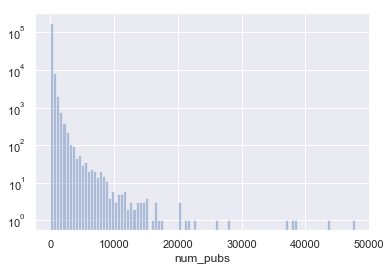

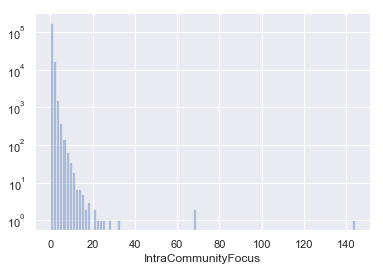

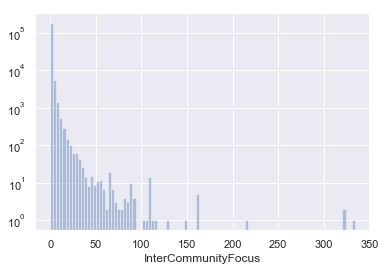

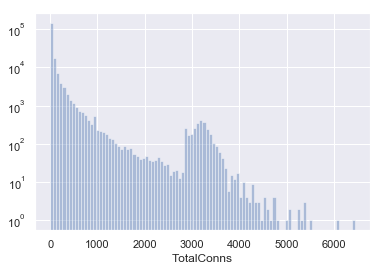

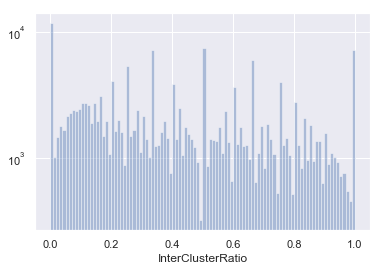

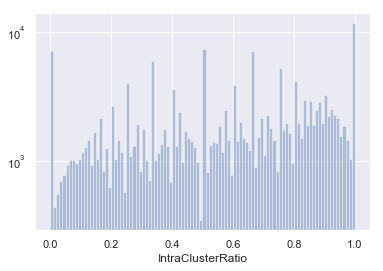

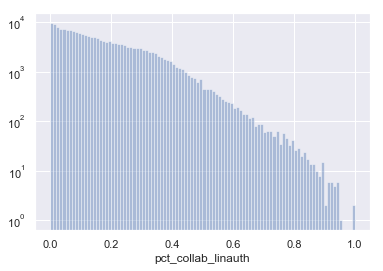

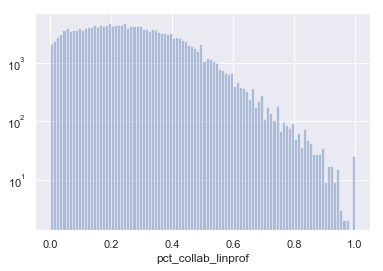

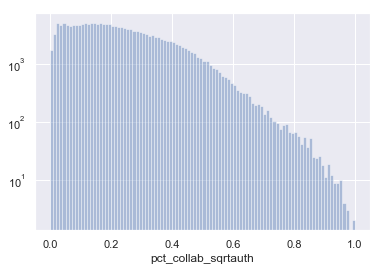

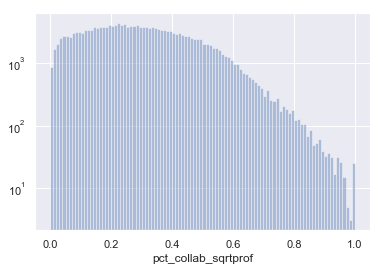

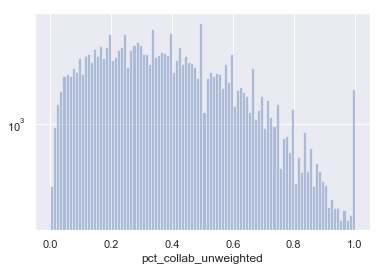

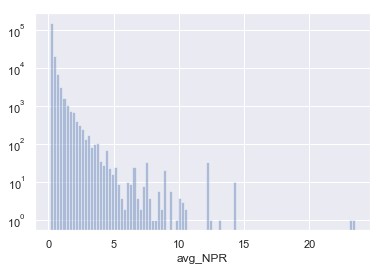

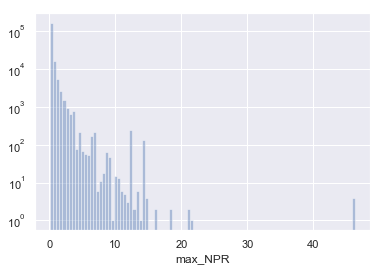

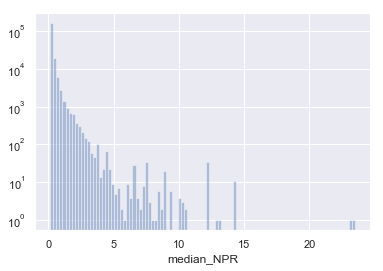

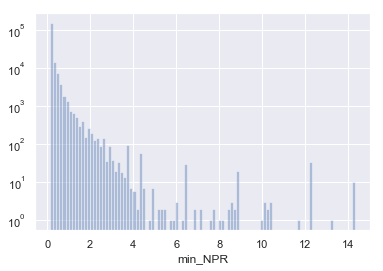

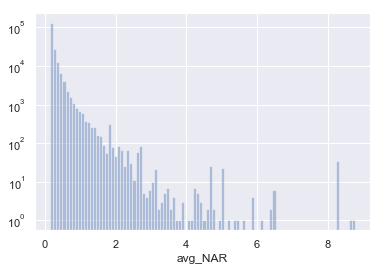

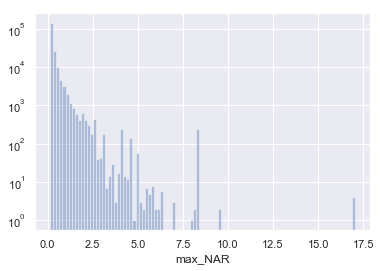

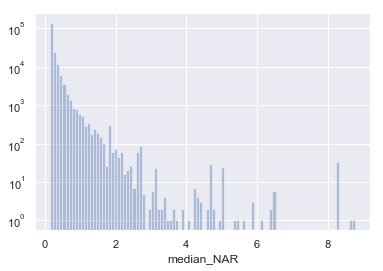

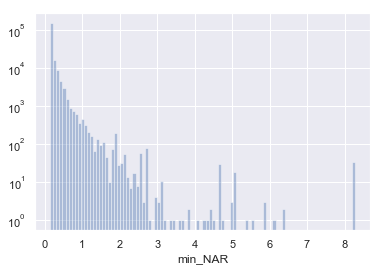

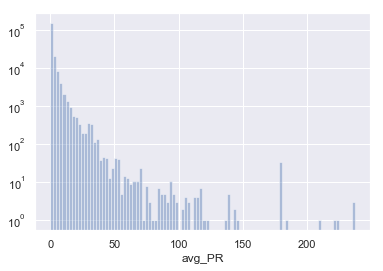

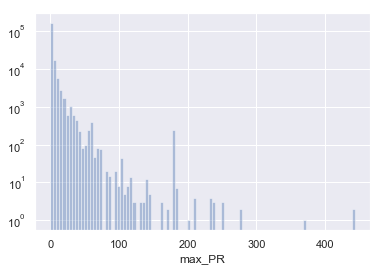

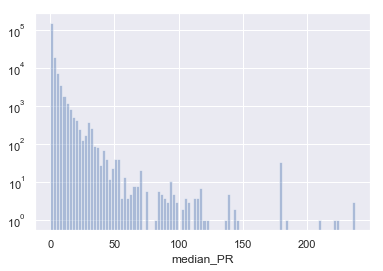

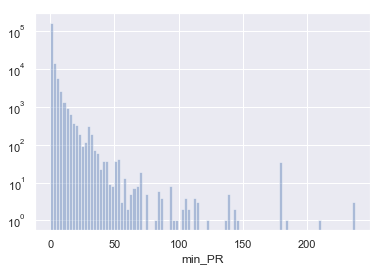

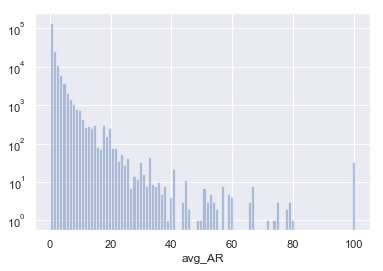

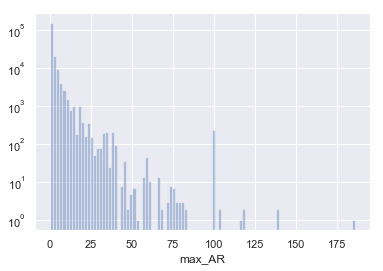

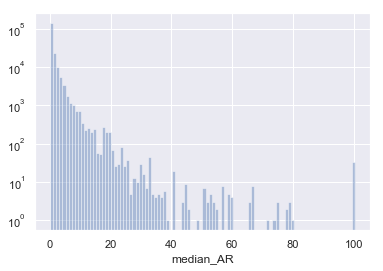

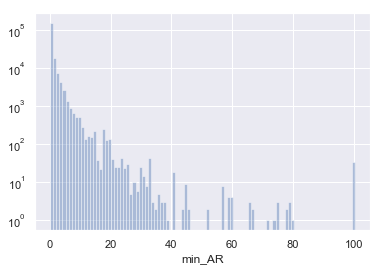

In [41]:
for col in df_trimmed.columns:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

In [42]:
print(df_zscores.columns)

Index(['num_pubs_Zscore', 'IntraCommunityFocus_Zscore',
       'InterCommunityFocus_Zscore', 'TotalConns_Zscore',
       'InterClusterRatio_Zscore', 'IntraClusterRatio_Zscore',
       'pct_collab_linauth_Zscore', 'pct_collab_linprof_Zscore',
       'pct_collab_sqrtauth_Zscore', 'pct_collab_sqrtprof_Zscore',
       'pct_collab_unweighted_Zscore', 'avg_NPR_Zscore', 'max_NPR_Zscore',
       'median_NPR_Zscore', 'min_NPR_Zscore', 'avg_NAR_Zscore',
       'max_NAR_Zscore', 'median_NAR_Zscore', 'min_NAR_Zscore',
       'avg_PR_Zscore', 'max_PR_Zscore', 'median_PR_Zscore', 'min_PR_Zscore',
       'avg_AR_Zscore', 'max_AR_Zscore', 'median_AR_Zscore', 'min_AR_Zscore'],
      dtype='object')


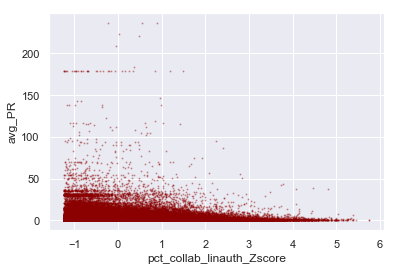

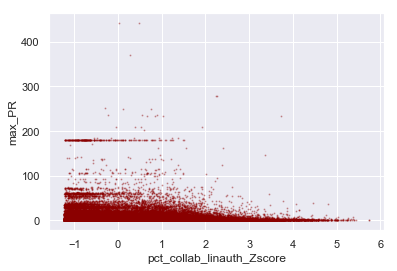

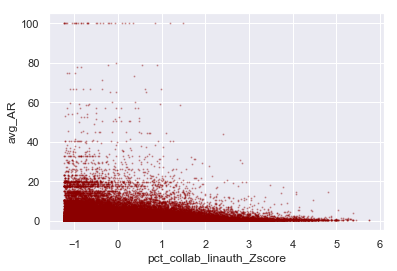

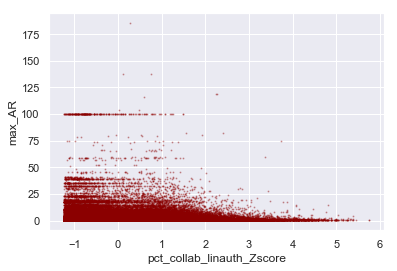

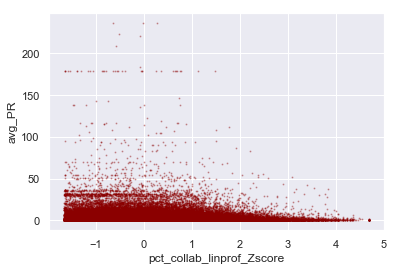

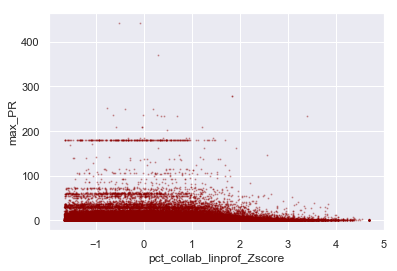

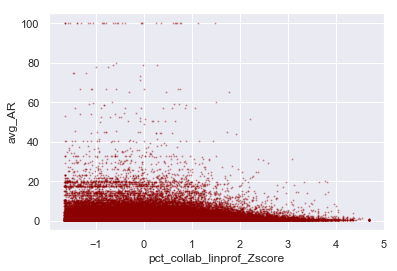

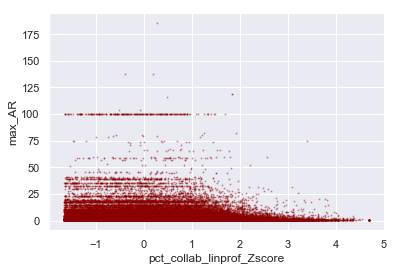

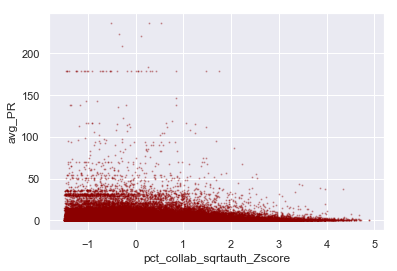

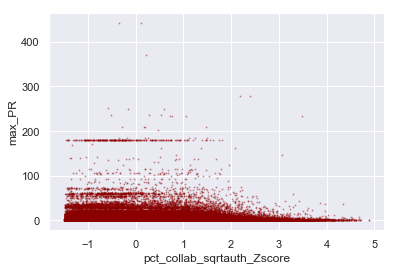

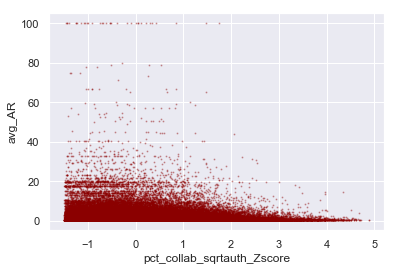

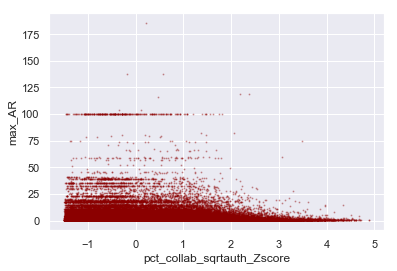

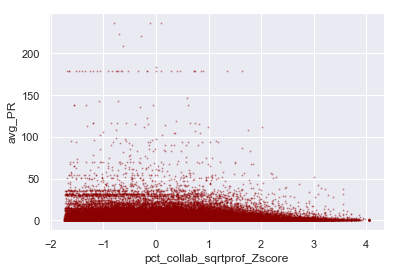

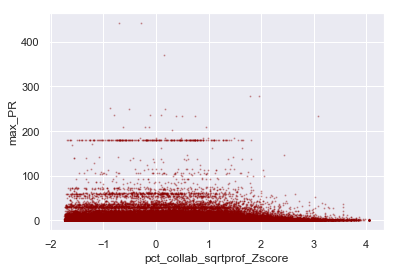

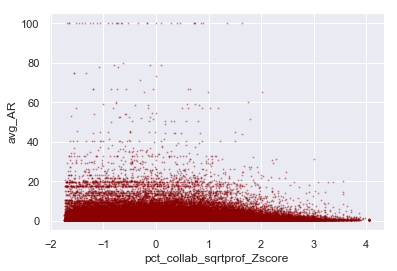

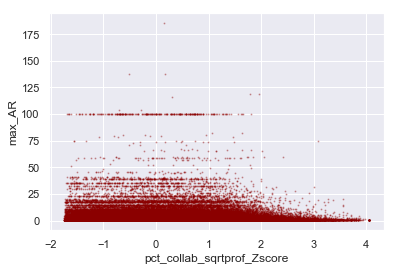

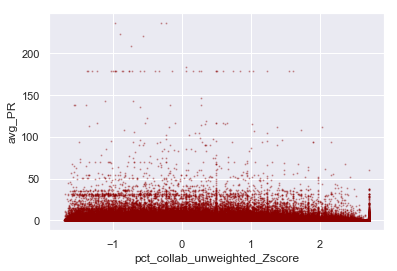

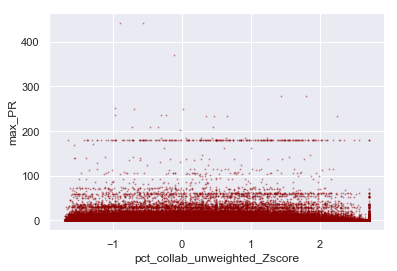

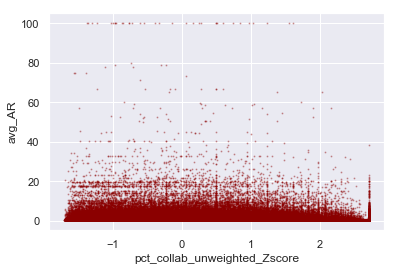

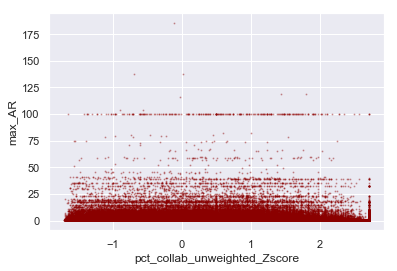

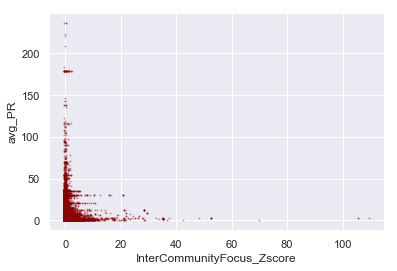

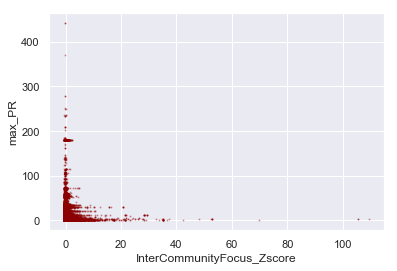

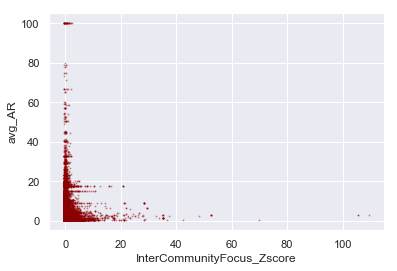

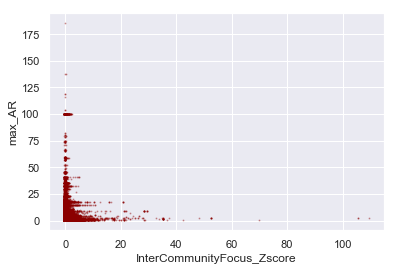

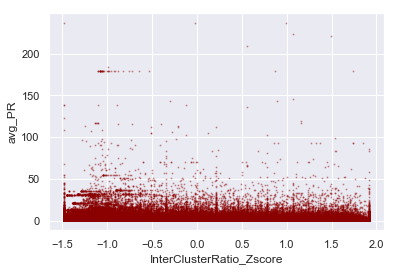

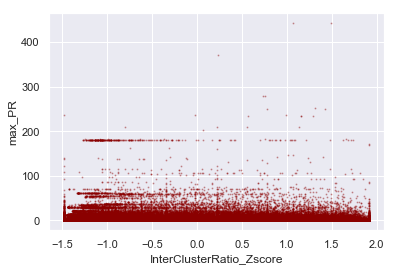

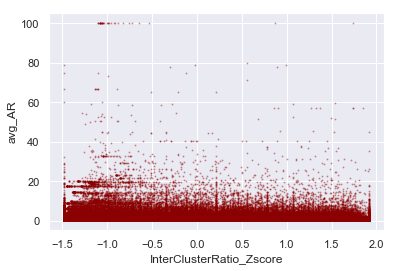

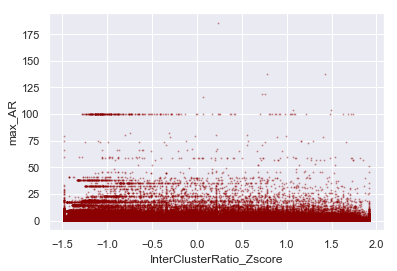

In [30]:
collab_columns = ['pct_collab_linauth_Zscore', 'pct_collab_linprof_Zscore', 
                  'pct_collab_sqrtauth_Zscore', 'pct_collab_sqrtprof_Zscore', 
                  'pct_collab_unweighted_Zscore','InterCommunityFocus_Zscore',
                  'InterClusterRatio_Zscore']
impact_columns = ['avg_PR', 'max_PR', 'avg_AR', 'max_AR']

for x_col in collab_columns:
    for y_col in impact_columns:
        data = pd.concat([df_zscores[[x_col]], df_trimmed[[y_col]]], axis = 1)
        g = sns.regplot(x=data[x_col], y=data[y_col], dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()

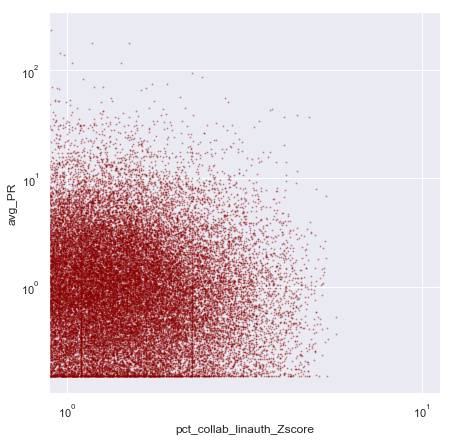

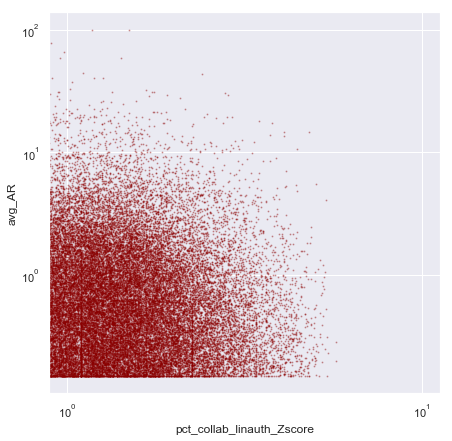

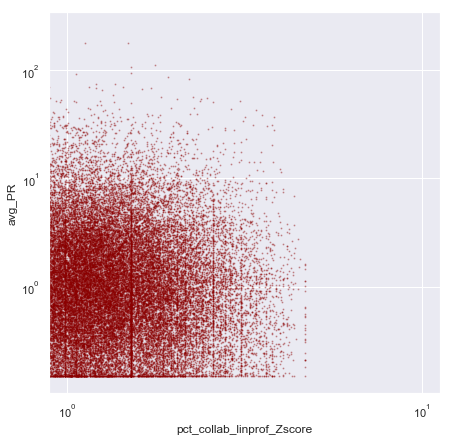

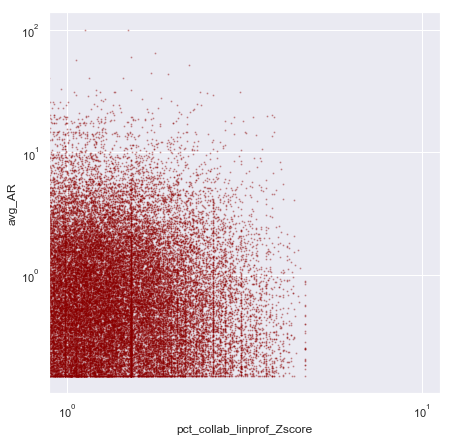

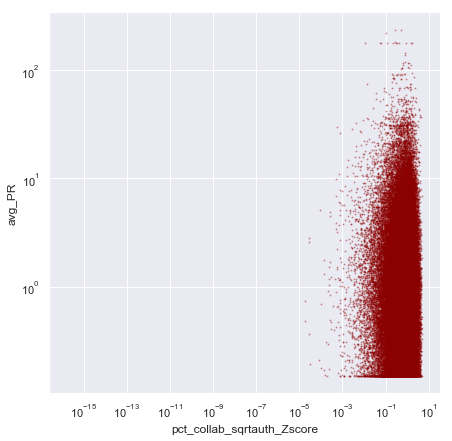

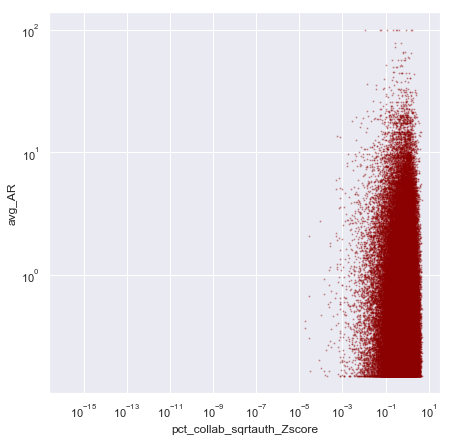

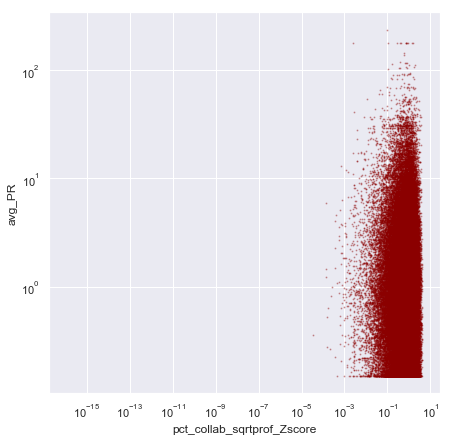

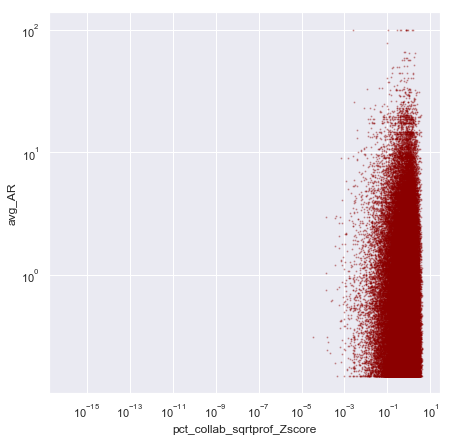

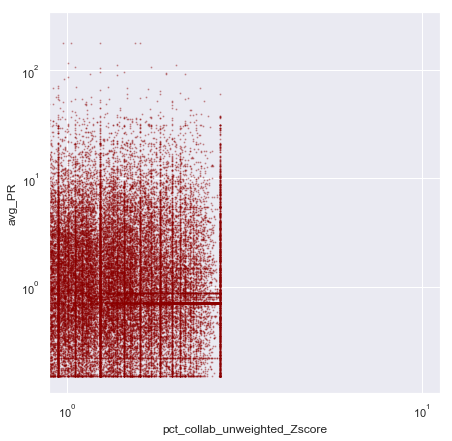

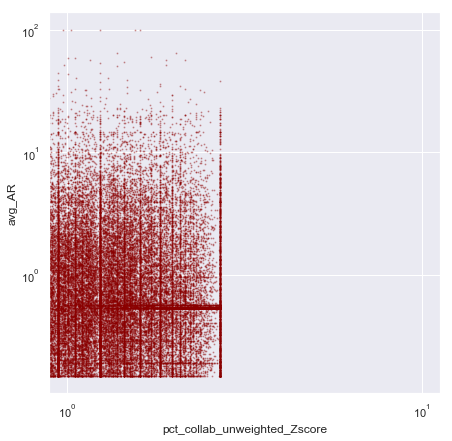

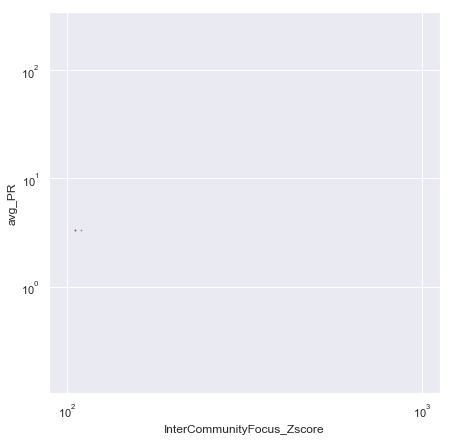

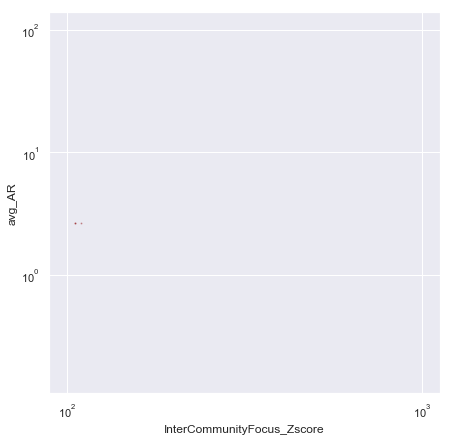

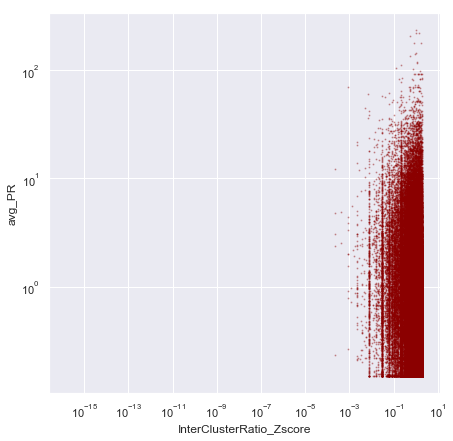

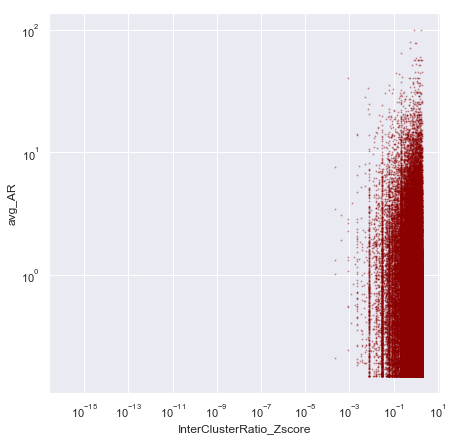

In [28]:
collab_columns = ['pct_collab_linauth_Zscore', 'pct_collab_linprof_Zscore', 
                  'pct_collab_sqrtauth_Zscore', 'pct_collab_sqrtprof_Zscore', 
                  'pct_collab_unweighted_Zscore','InterCommunityFocus_Zscore',
                  'InterClusterRatio_Zscore']
impact_columns = ['avg_PR', 'avg_AR']

for x_col in collab_columns:
    for y_col in impact_columns:
        data = pd.concat([df_zscores[[x_col]], df_trimmed[[y_col]]], axis = 1)
        f, ax = plt.subplots(figsize=(7, 7))
        ax.set(xscale="log", yscale="log")
        
        g = sns.regplot(x_col, y_col, data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


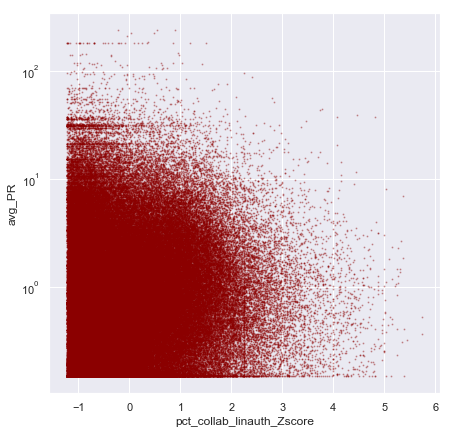

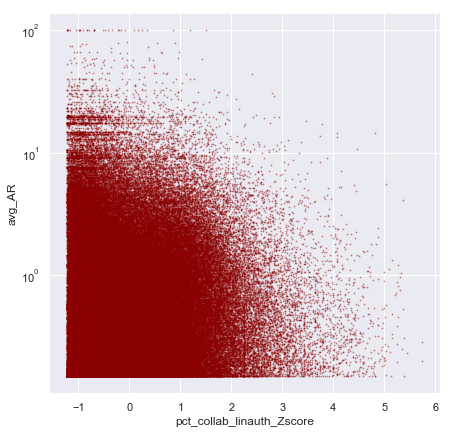

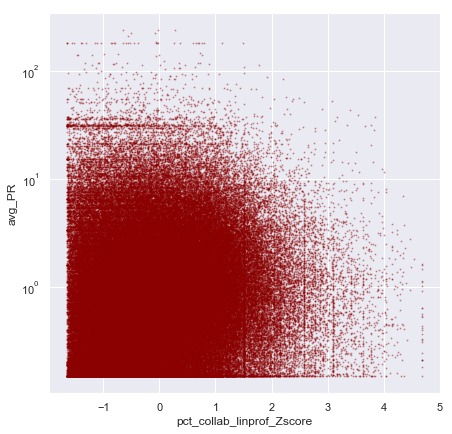

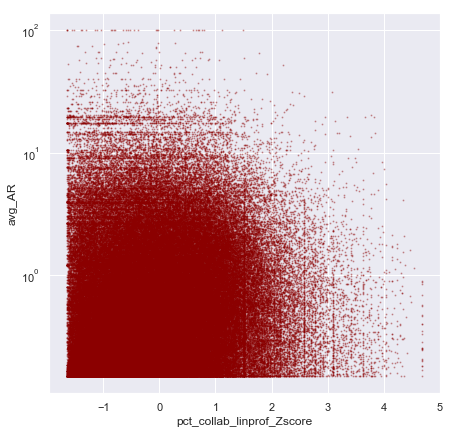

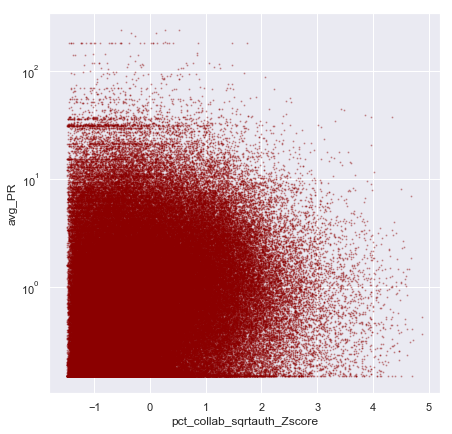

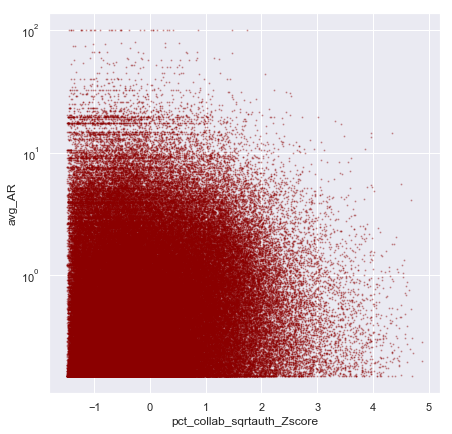

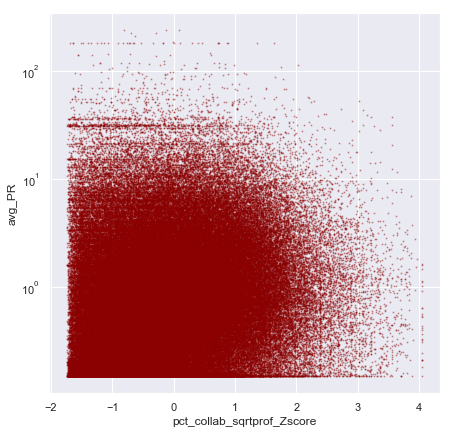

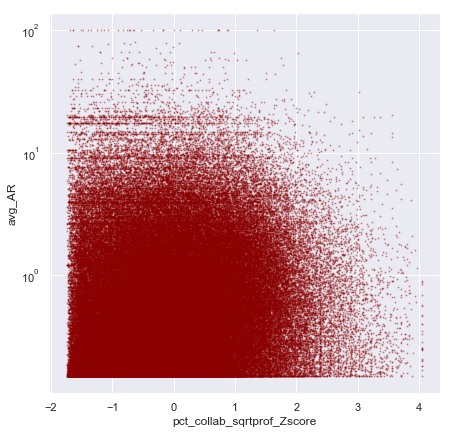

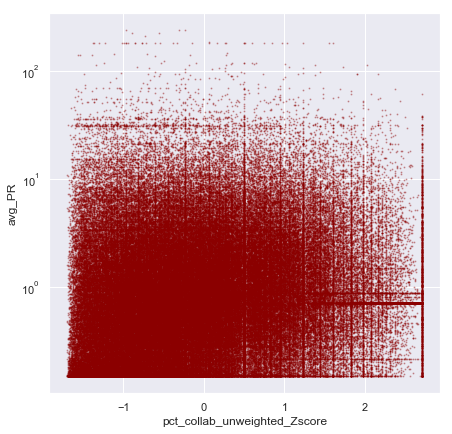

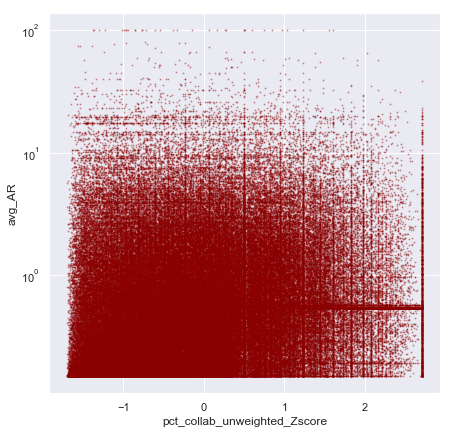

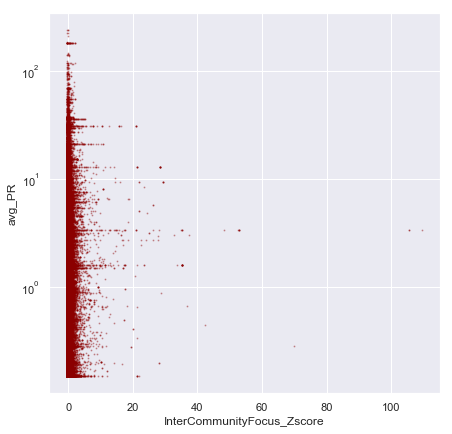

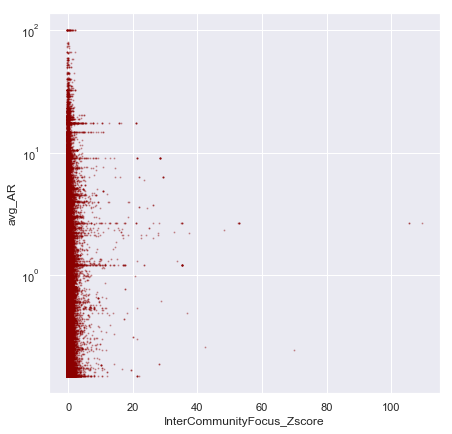

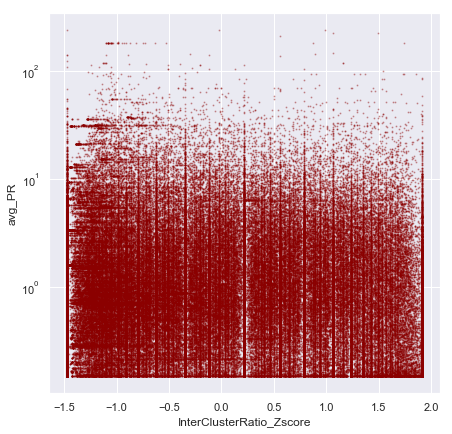

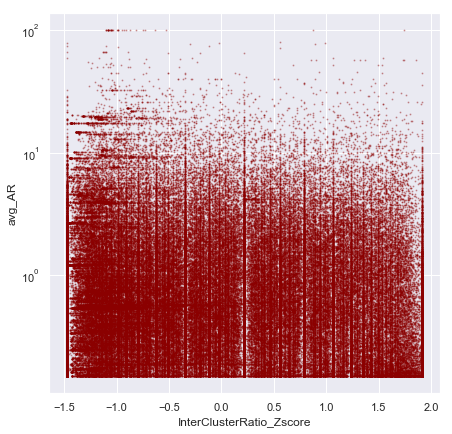

In [27]:
collab_columns = ['pct_collab_linauth_Zscore', 'pct_collab_linprof_Zscore', 
                  'pct_collab_sqrtauth_Zscore', 'pct_collab_sqrtprof_Zscore', 
                  'pct_collab_unweighted_Zscore','InterCommunityFocus_Zscore',
                  'InterClusterRatio_Zscore']
impact_columns = ['avg_PR', 'avg_AR']

for x_col in collab_columns:
    for y_col in impact_columns:
        data = pd.concat([df_zscores[[x_col]], df_trimmed[[y_col]]], axis = 1)
        f, ax = plt.subplots(figsize=(7, 7))
        ax.set(yscale="log")
        
        g = sns.regplot(x_col, y_col, data, ax=ax, dropna = True, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":1})
        plt.show()


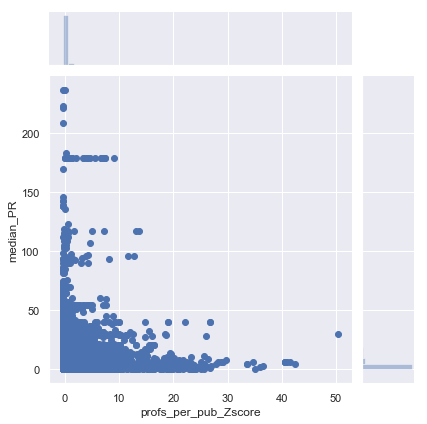

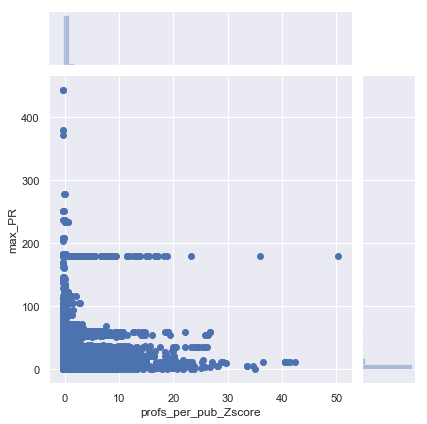

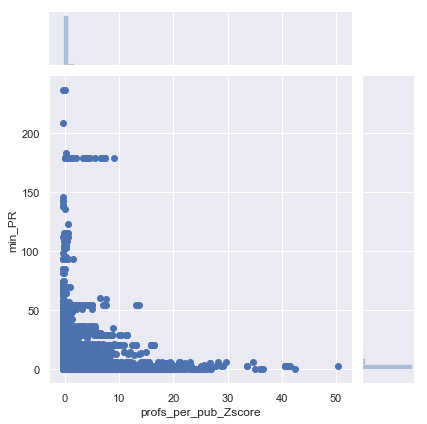

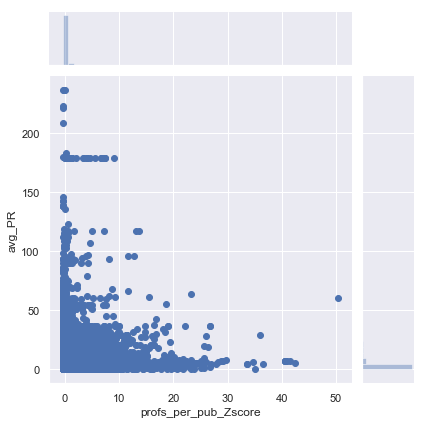

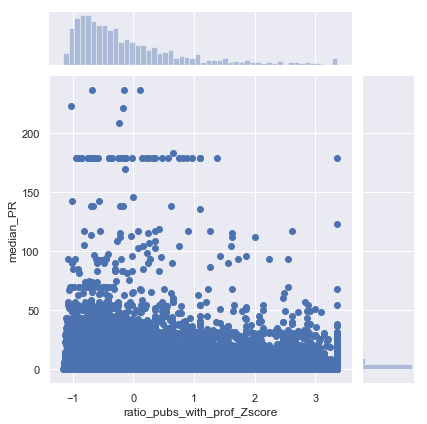

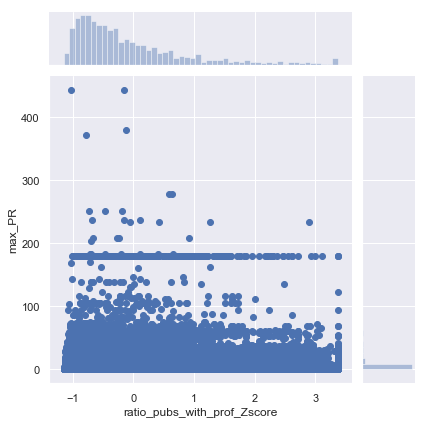

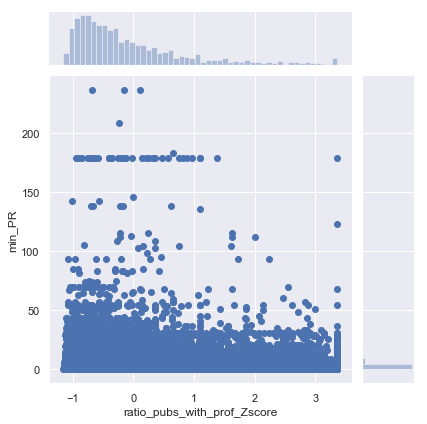

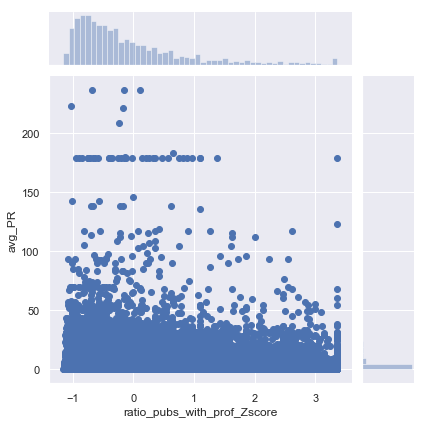

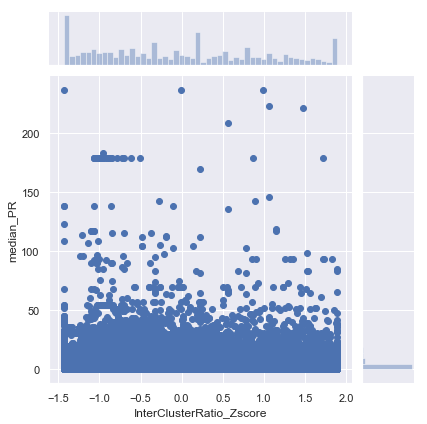

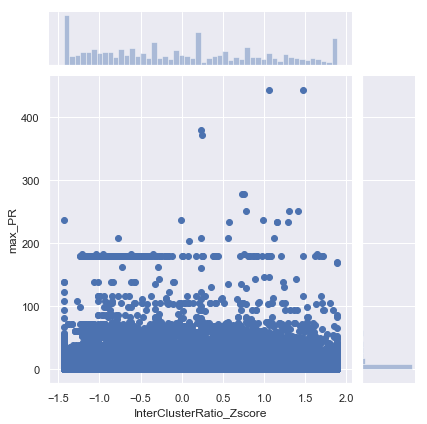

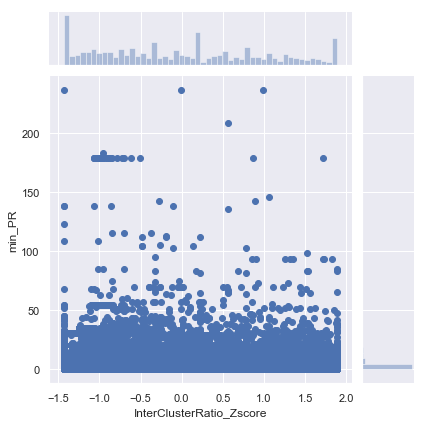

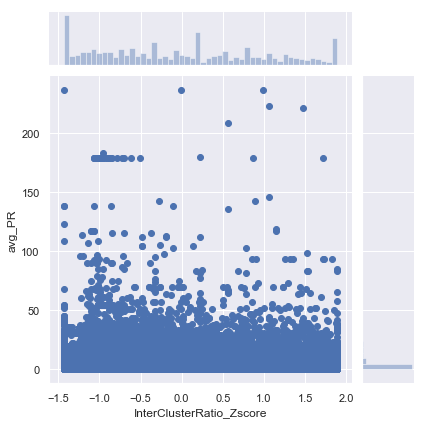

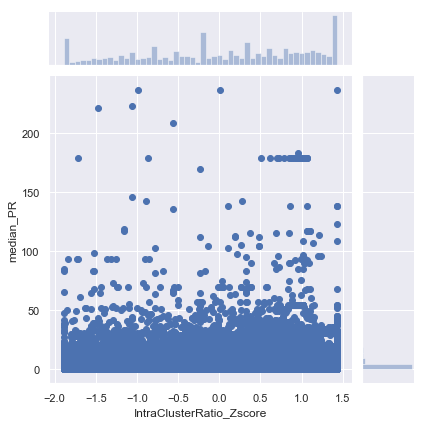

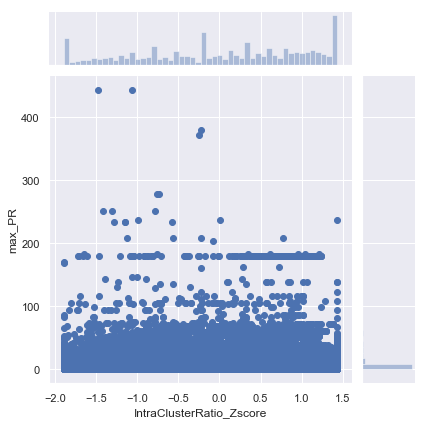

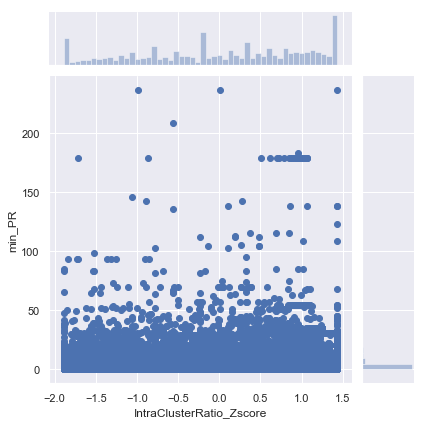

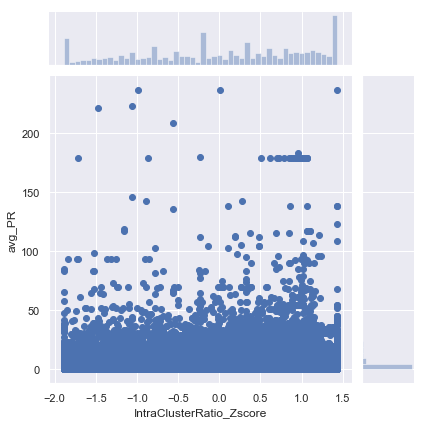

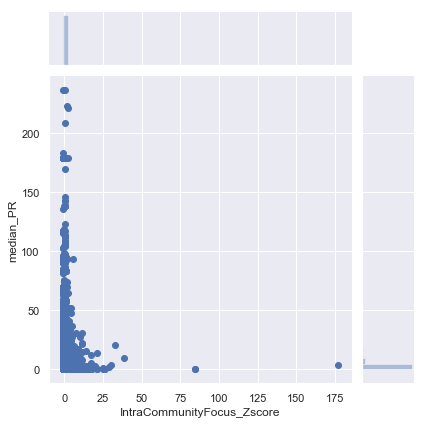

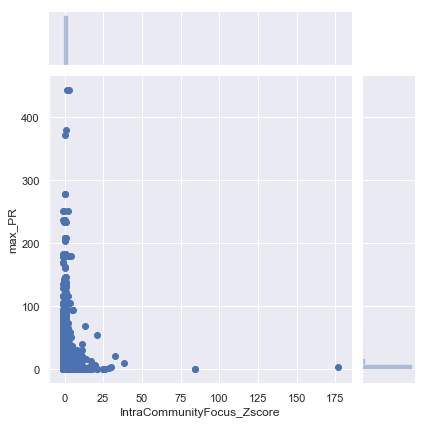

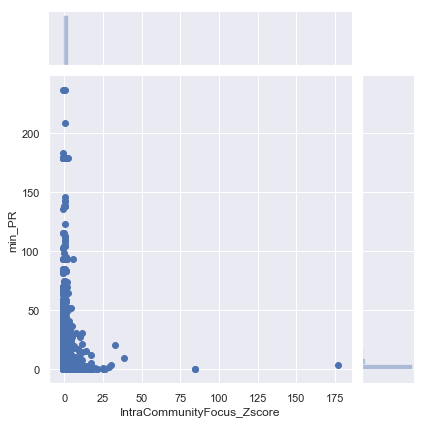

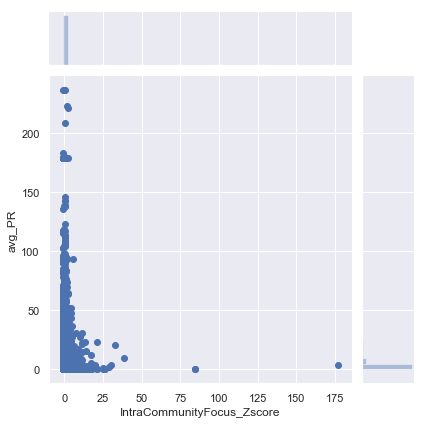

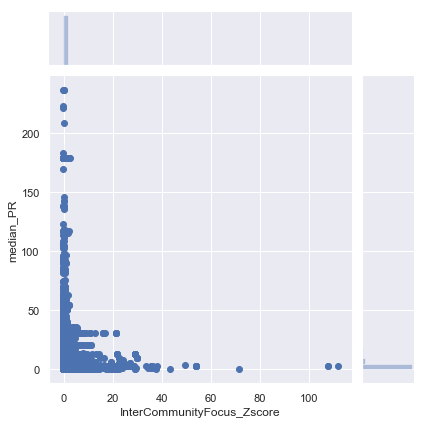

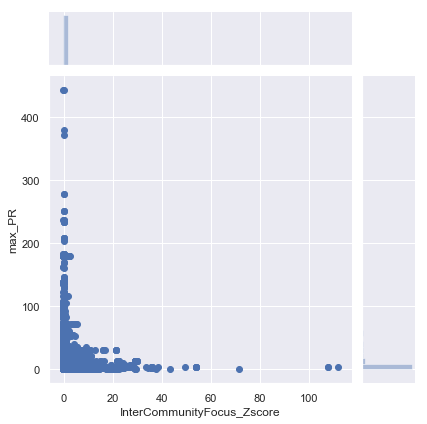

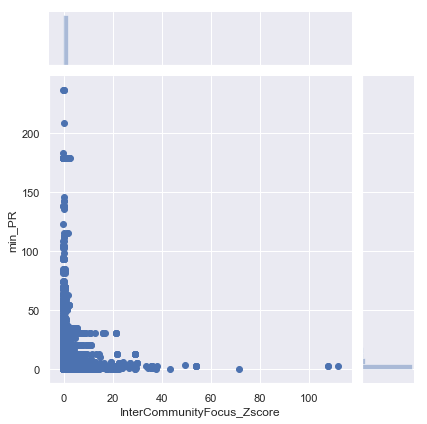

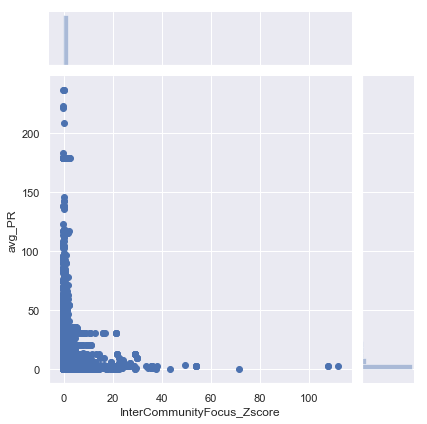

In [18]:
collab_columns = ['pct_collab_linauth_Zscore', 'pct_collab_linprof_Zscore', 
                  'pct_collab_sqrtauth_Zscore', 'pct_collab_sqrtprof_Zscore', 
                  'pct_collab_unweighted_Zscore','InterCommunityFocus_Zscore',
                  'InterClusterRatio_Zscore']
impact_columns = ['avg_PR', 'avg_AR']

for x_col in collab_columns:
    for y_col in impact_columns:
        g = sns.jointplot(x = x_col, y = y_col, data = pd.concat([df_zscores[[x_col]], df_trimmed[[y_col]]], axis = 1), dropna = True)
#         g.ax_marg_x.set_xscale('log')
#         g.ax_marg_y.set_yscale('log')
        plt.show()